This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://opensource.org/license/apache-2-0/)  

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_2095/826285489.py:1: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://github.com/cad-polito-it/byron/blob/alpha/docs/paranoia.md for details]
  import byron


In [2]:
variable = byron.f.choice_parameter(('a', 'b', 'c', 'd'))
comp_operators = byron.f.choice_parameter(('<', '<=', '==', '!=', '>=', '>'))
comparison = byron.f.macro('{var1} {cop} {var2}', var1=variable, cop=comp_operators, var2=variable)
init = byron.f.macro('{var} = {num}', var=variable, num=byron.f.integer_parameter(0, 1000))
math = byron.f.macro(
    '{var1} = {var2} {op} {var3}', var1=variable, var2=variable, op=byron.f.choice_parameter('+-*/%'), var3=variable
)
code = byron.f.bunch([init, math], size=(3, 10), extra_parameters={'_text_after_macro': '\n'})
if_then_else = byron.f.sequence(
    ('IF ', comparison, ' THEN\n', code, 'ELSE\n', code, 'ENDIF'), extra_parameters={'_text_after_macro': ''}
)

In [3]:
byron.f.as_text(if_then_else, node_info=False)

IF a == d THEN
d = 631
d = d * d
b = a % a
c = 683
b = b / b
a = b % a
b = d - c
d = 312
ELSE
b = 804
c = a * a
d = c % c
b = c - a
c = 114
c = 471
ENDIF


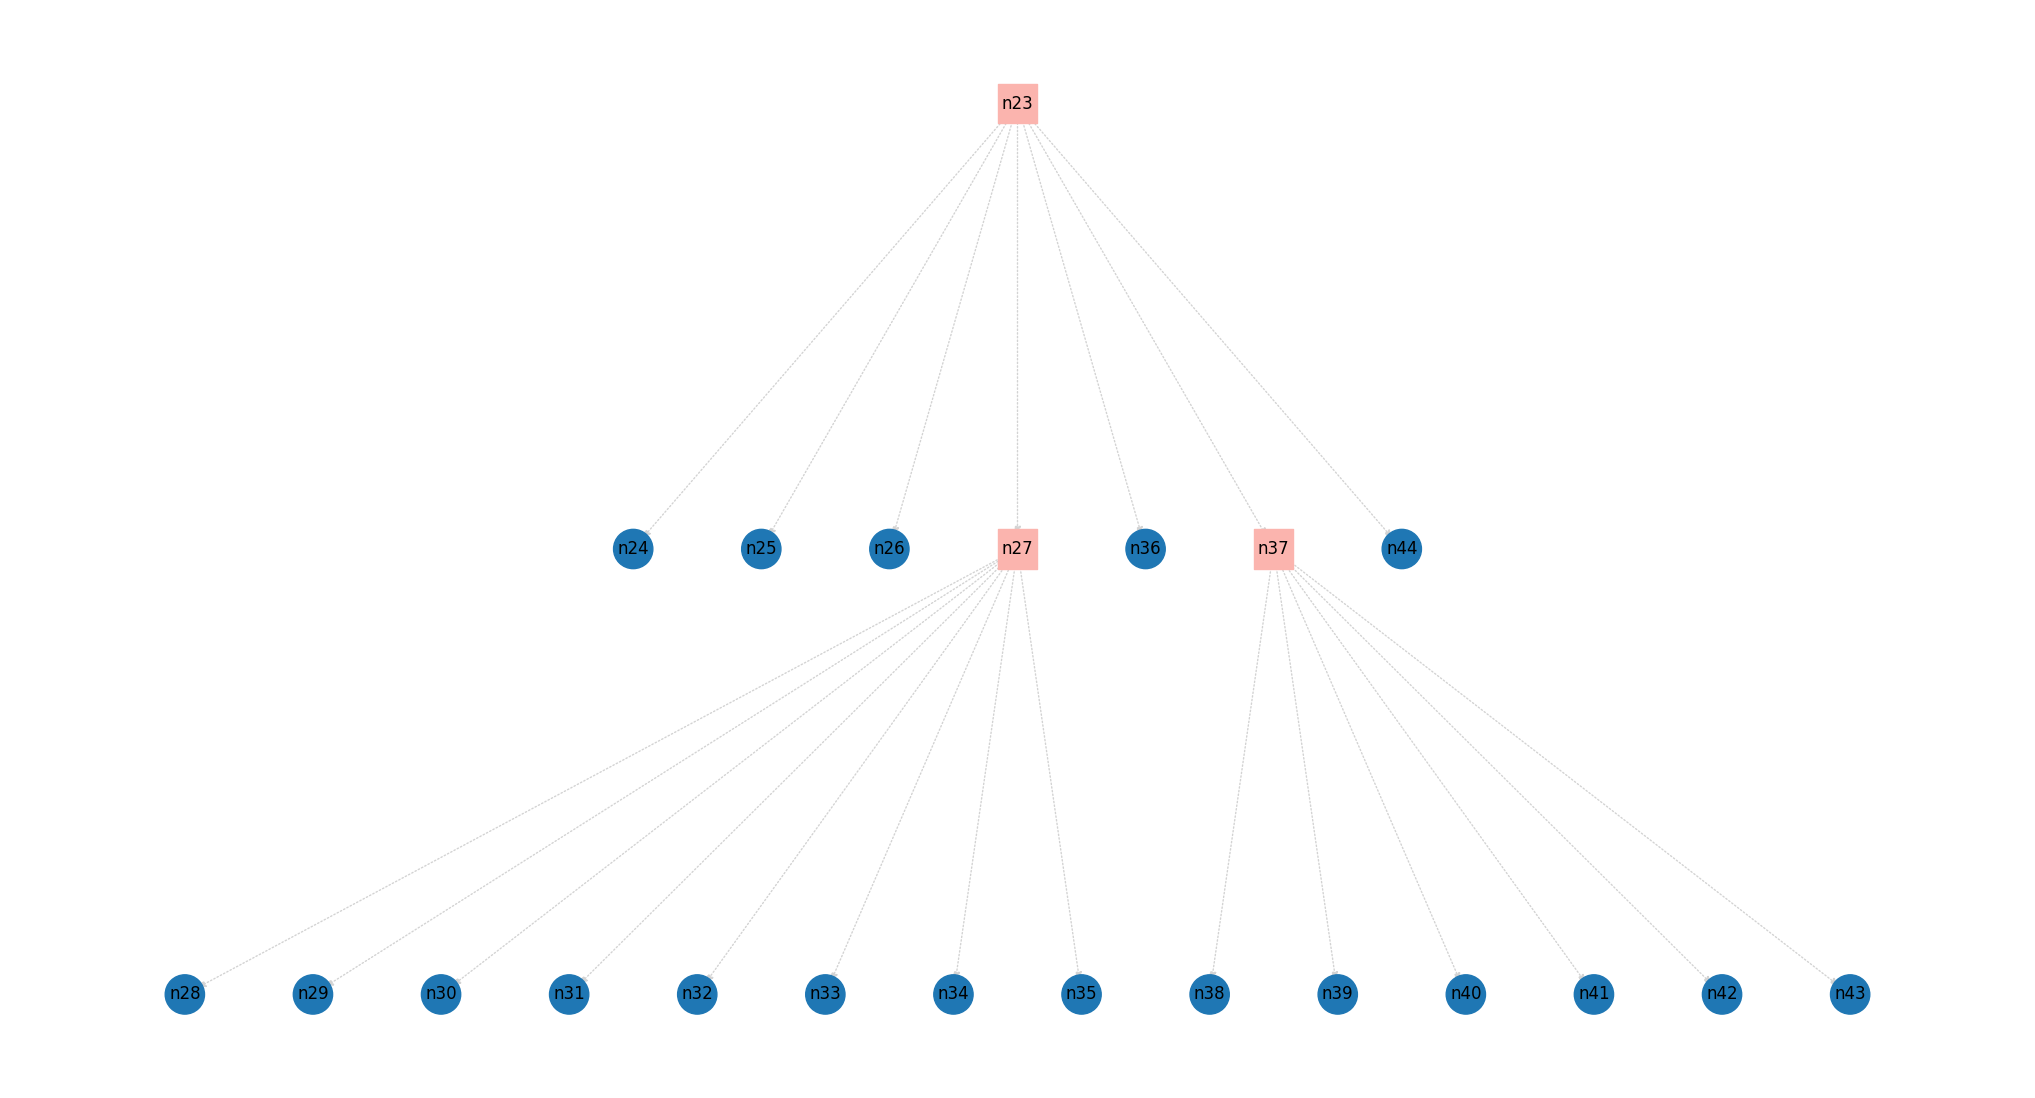

In [4]:
byron.f.as_forest(if_then_else)

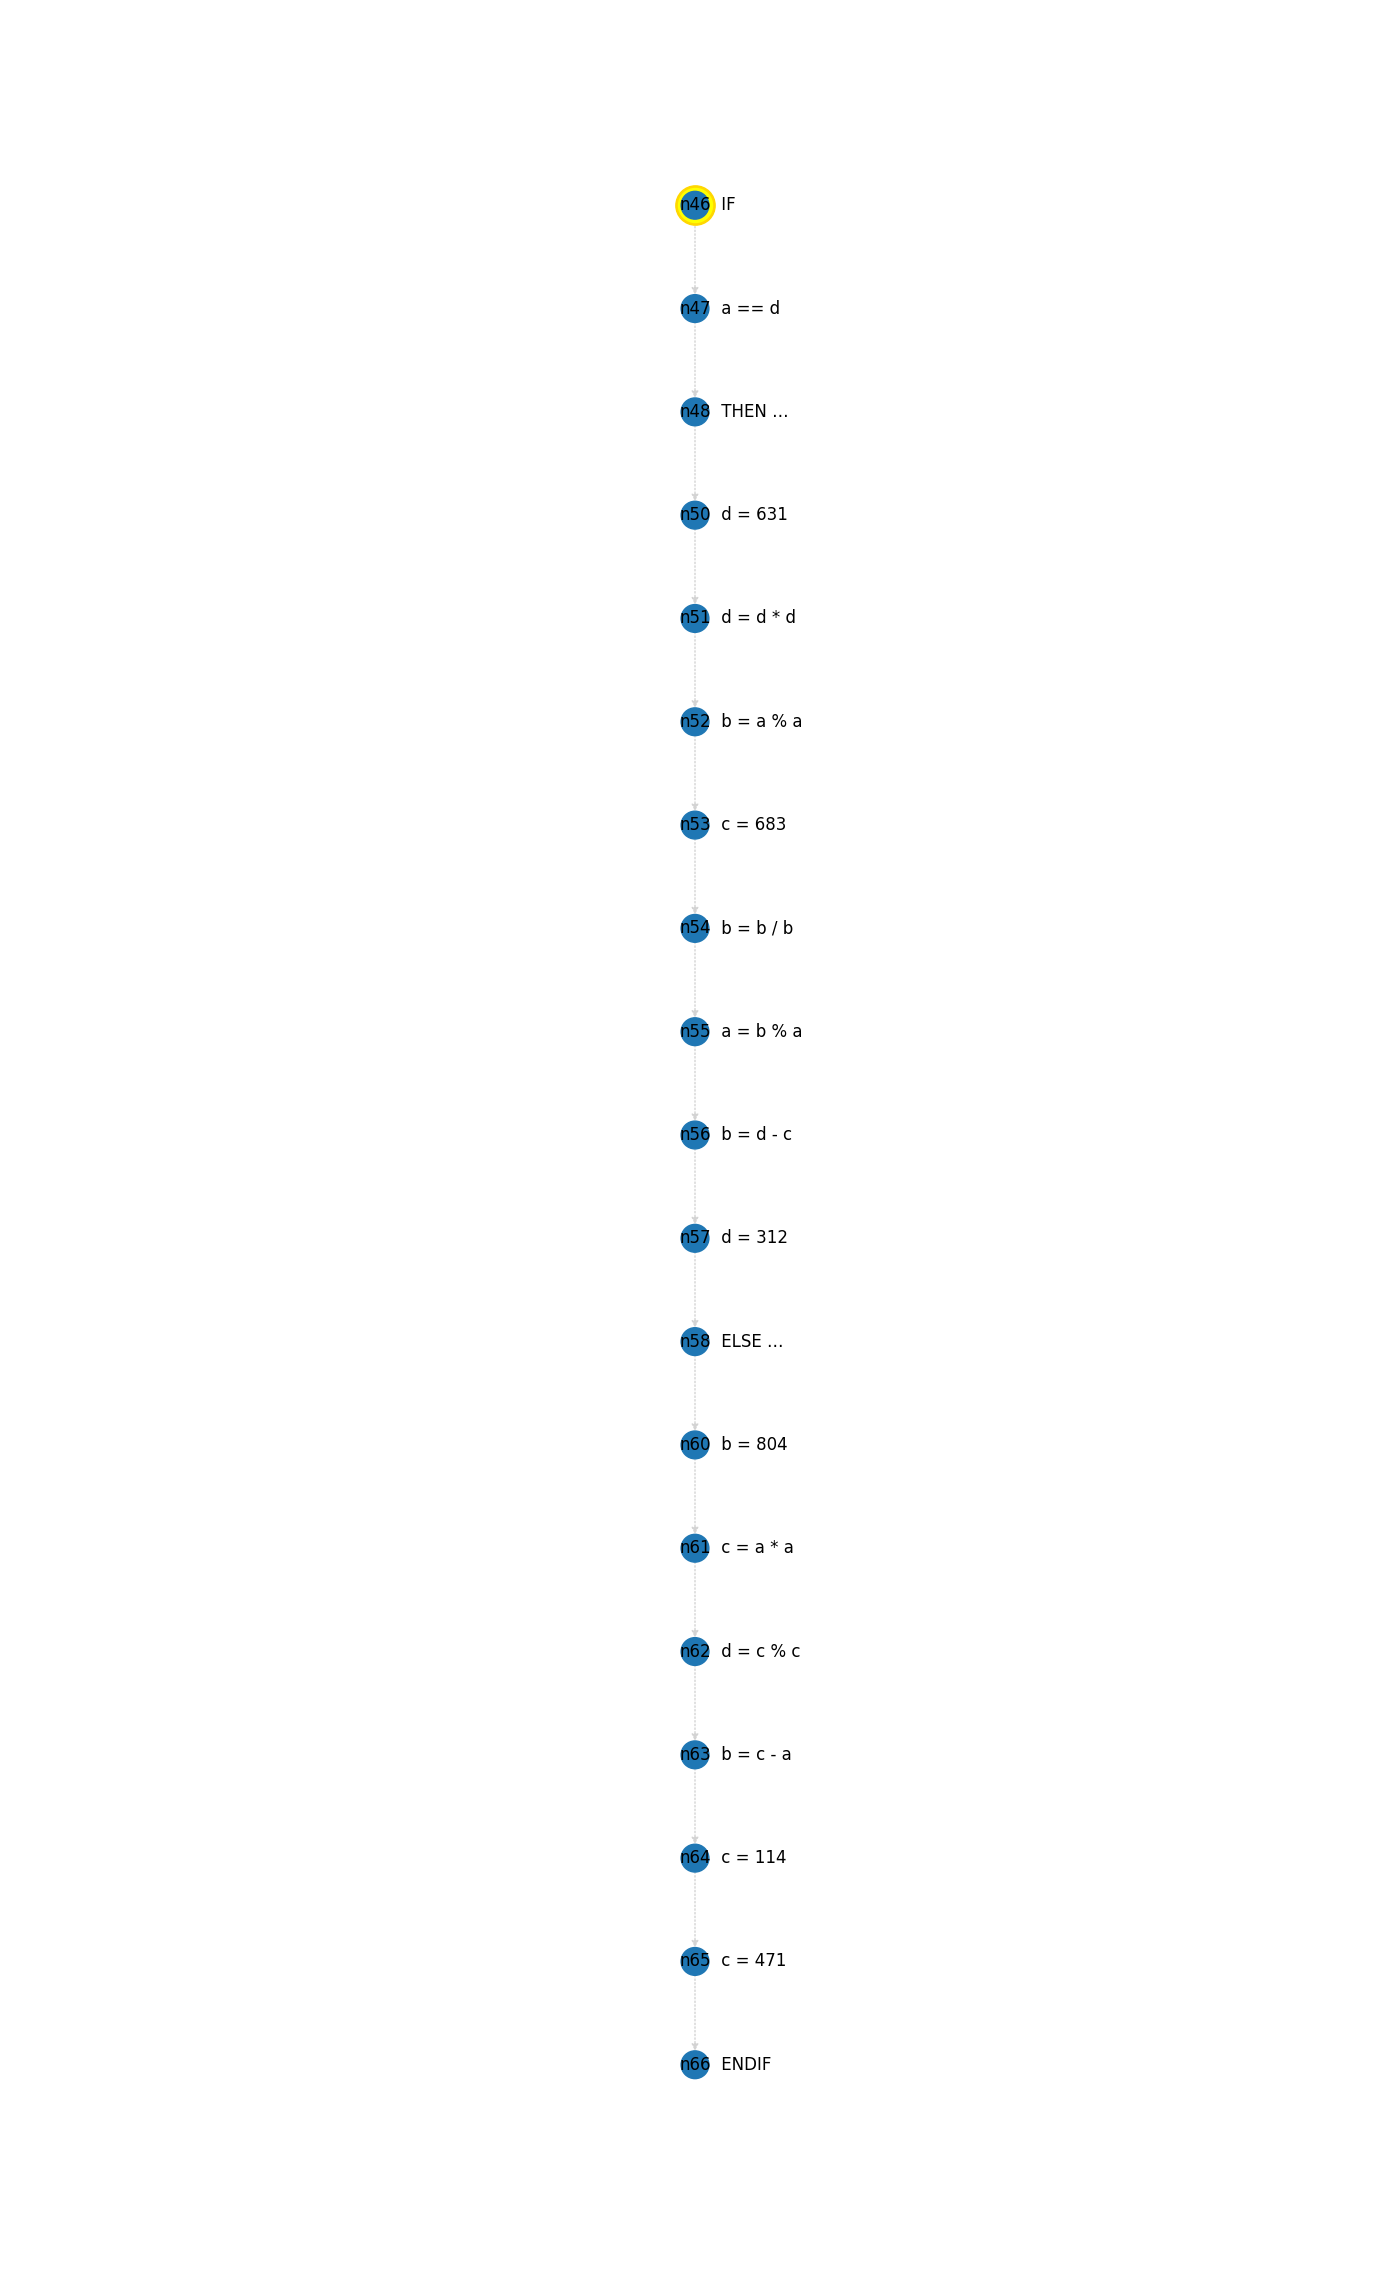

In [5]:
byron.f.as_lgp(if_then_else)